In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [7]:
class Perceptron():
    
    def __init__(self,n_iter=10, eta=0.01):
        self.eta=eta
        self.n_iter=n_iter
        
    def fit(self,X,Y):
        self.w= np.zeros(1+X.shape[1])
        self.errors=[]
        for _ in range(self.n_iter):
            error=0
            for x,y in zip(X,Y):
                update= self.eta*(y-self.predict(x))
                self.w[1:]+= update*x
                self.w[0]+=update
                error+=int(update!=0)
            self.errors.append(error)
        return self
    def logit(self,X):
        return np.dot(X,self.w[1:])+self.w[0]
    
    def predict(self,X):
        return np.where(self.logit(X)>=0.0,1,-1)
    
def plot_decision_regions(X,Y,classifier,resolution=0.02):
    colors=("blue","red","cyan","yellow")
    markers=("o","x","s","v")
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z=z.reshape(xx1.shape)
    cmap=ListedColormap(colors[0:len(np.unique(Y))])
    plt.contourf(xx1,xx2,z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(Y)):
        plt.scatter(x=X[Y == cl, 0], y=X[Y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
        
                
                

In [3]:
iris=datasets.load_iris()
X=iris.data[:100][:,[0,2]]
Y=iris.target[:100]
Y=np.where(Y==0,-1,1)

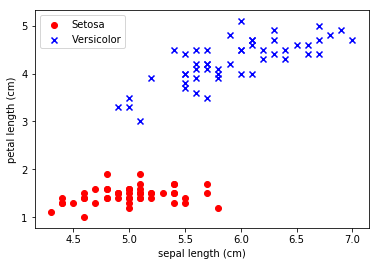

In [4]:
plt.scatter(X[0:50,0],X[:50,1],color="red",label="Setosa")
plt.scatter(X[50:,0],X[50:,1],color="blue",marker="x",label="Versicolor")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.legend()

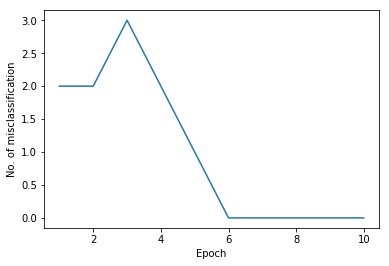

In [5]:
p1=Perceptron(n_iter=10,eta=0.01)
p1.fit(X,Y)
plt.plot(range(1,len(p1.errors)+1),p1.errors)
plt.xlabel("Epoch")
plt.ylabel("No. of misclassification")

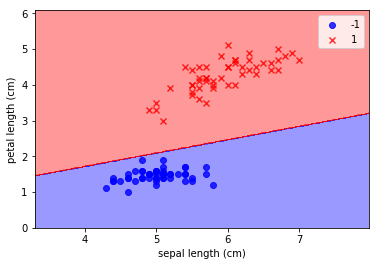

In [8]:
plot_decision_regions(X,Y,classifier=p1)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.legend()